In [1]:
import os
os.getcwd()

'd:\\hardhat\\KAGGLE\\Digit Recogniser'





Epoch 1/10


1050/1050 [==============================] - 97s 80ms/step - loss: 0.1796 - accuracy: 0.9460 - val_loss: 0.0724 - val_accuracy: 0.9761
Epoch 2/10
1050/1050 [==============================] - 86s 82ms/step - loss: 0.0530 - accuracy: 0.9833 - val_loss: 0.0410 - val_accuracy: 0.9871
Epoch 3/10
1050/1050 [==============================] - 85s 81ms/step - loss: 0.0345 - accuracy: 0.9888 - val_loss: 0.0509 - val_accuracy: 0.9844
Epoch 4/10
1050/1050 [==============================] - 82s 78ms/step - loss: 0.0259 - accuracy: 0.9912 - val_loss: 0.0430 - val_accuracy: 0.9881
Epoch 5/10
1050/1050 [==============================] - 81s 77ms/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.0428 - val_accuracy: 0.9873
Epoch 6/10
1050/1050 [==============================] - 81s 77ms/step - loss: 0.0135 - accuracy: 0.9957 - val_loss: 0.0456 - val_accuracy: 0.9869
Epoch 7/10
1050/1050 [==============================] - 83s 79ms/step - loss: 0.0114 - accuracy: 0.9961 - val_loss: 0.

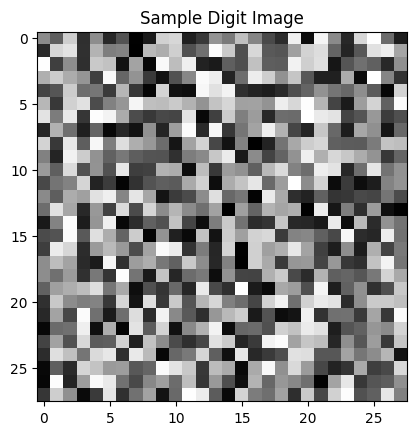

c:\Users\soni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load the training and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Separate features and labels
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.values

# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to fit the model (28x28 images with 1 color channel)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, 10)

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions from one-hot encoding to label
predicted_labels = np.argmax(predictions, axis=1)

# Prepare the submission dataframe
submission_df = pd.DataFrame({
    'ImageId': np.arange(1, len(predicted_labels) + 1),
    'Label': predicted_labels
})
# Generate a random sample digit (replace this with an actual digit image for real use cases)
sample_digit = np.random.rand(28, 28)

# Display the sample digit
plt.imshow(sample_digit, cmap='gray')
plt.title("Sample Digit Image")
plt.show()

# Save the submission dataframe to a CSV file
#submission_df.to_csv('submission.csv', index=False)
model.save('model.h5')

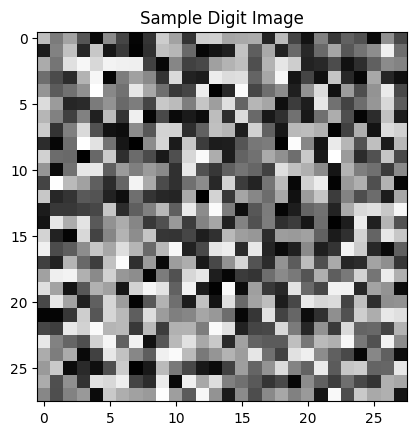

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a random sample digit (replace this with an actual digit image for real use cases)
sample_digit = np.random.rand(28, 28)

# Display the sample digit
plt.imshow(sample_digit, cmap='gray')
plt.title("Sample Digit Image")
plt.show()


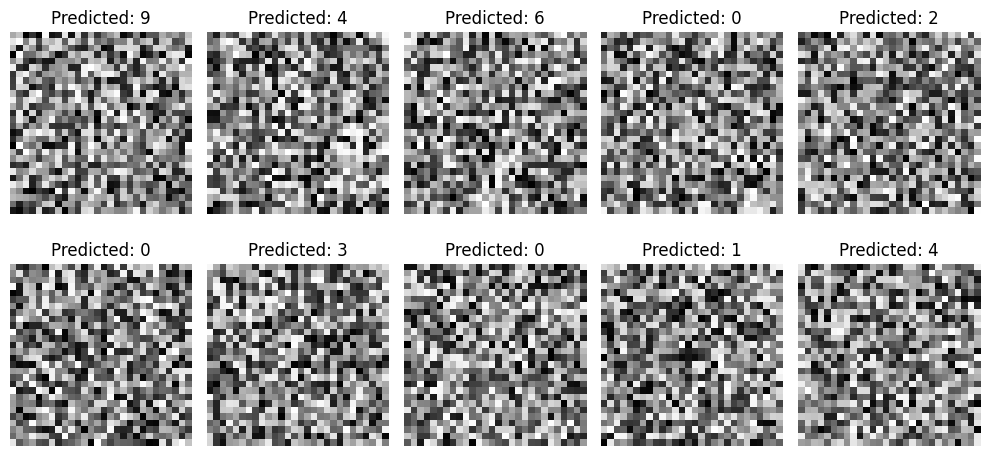

In [2]:
import matplotlib.pyplot as plt

# Generate random sample digits and their predicted labels (replace these with actual data for real use cases)
sample_digits = np.random.rand(10, 28, 28)  # 10 random digit images
predicted_labels = np.random.randint(0, 10, size=10)  # 10 random predictions

# Plot the sample digits with predicted labels
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(sample_digits[i], cmap='gray')
    ax.set_title(f"Predicted: {predicted_labels[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()
